In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from utilsforecast.plotting import plot_series 
from coreforecast.scalers import boxcox, boxcox_lambda
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(f'../DATA/aus_production.csv')
df['ds'] = pd.to_datetime(df['ds'])

,ds,Beer,Tobacco,Bricks,Cement,Electricity,Gas
0,1956-01-01,284,5225.0,189.0,465,3923,5
1,1956-04-01,213,5178.0,204.0,532,4436,6
2,1956-07-01,227,5297.0,208.0,561,4806,7
3,1956-10-01,308,5681.0,197.0,570,4418,6
4,1957-01-01,262,5577.0,187.0,529,4339,5


<Axes: xlabel='ds', ylabel='Tobacco'>

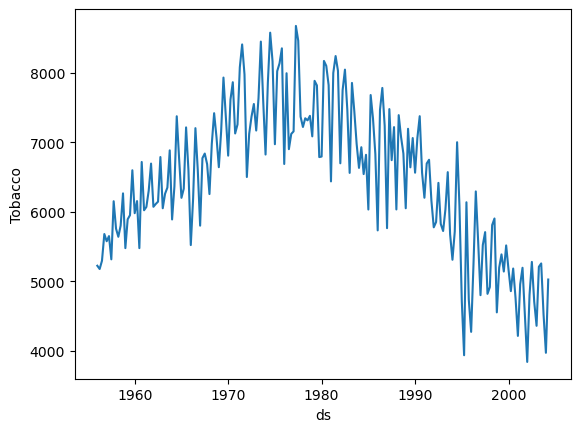

In [4]:
sns.lineplot(df, x='ds', y='Tobacco')

<Axes: xlabel='ds', ylabel='Tobacco'>

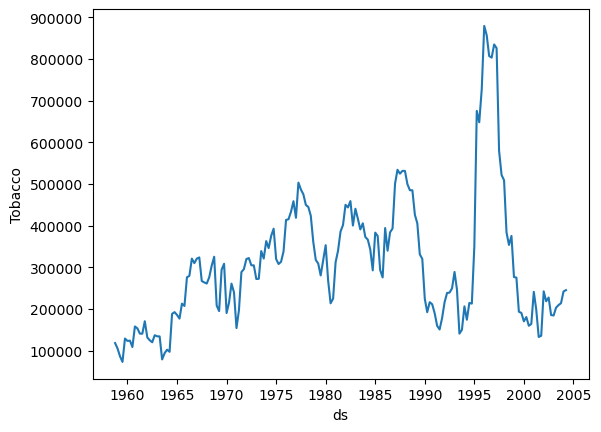

In [13]:
sns.lineplot(df, x='ds', y=df['Tobacco'].rolling(12).var())

0.20770140000000004


3.044570899986914e-05

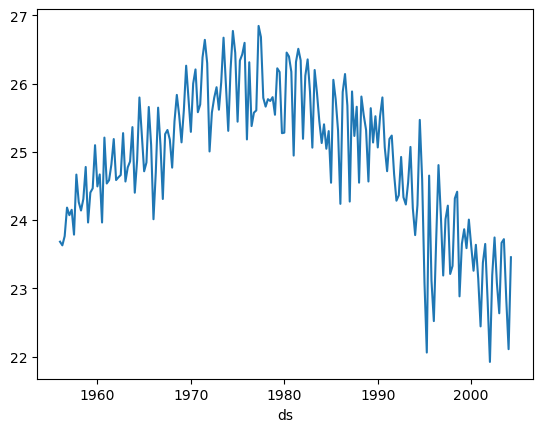

In [32]:
optim_lambda = boxcox_lambda(df["Tobacco"].to_numpy(), method="guerrero", season_length=4)
print(optim_lambda)
y_transformed = boxcox(df["Tobacco"].to_numpy(), optim_lambda)
sns.lineplot(df, x='ds', y=y_transformed)s

<Axes: xlabel='ds', ylabel='0'>

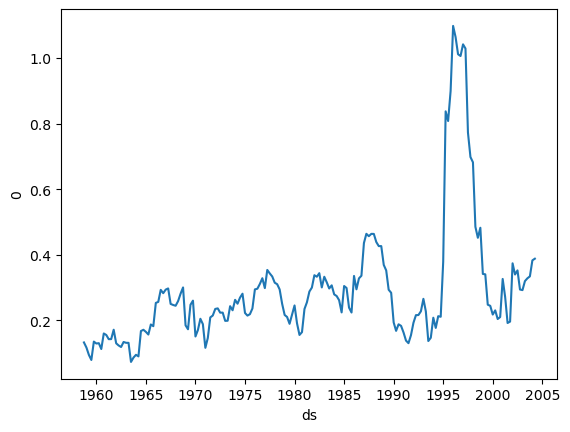

In [20]:
test = pd.DataFrame(y_transformed)
sns.lineplot(df, x='ds', y=test[0].rolling(12).var())

3.044570899986914e-05

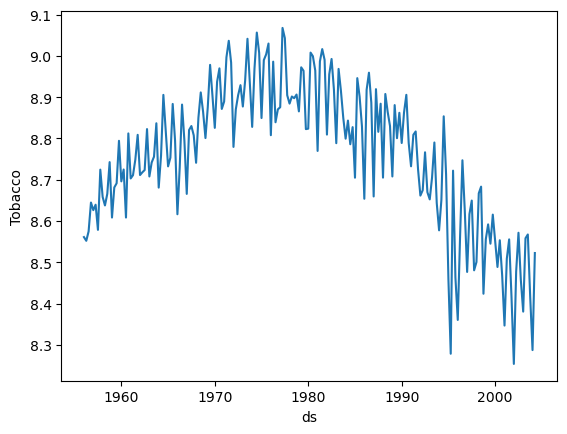

In [28]:
y_transformed = np.log(df["Tobacco"])
sns.lineplot(df, x='ds', y=y_transformed)
test['Tobacco'].rolling(12).var().var()

<Axes: xlabel='ds', ylabel='Tobacco'>

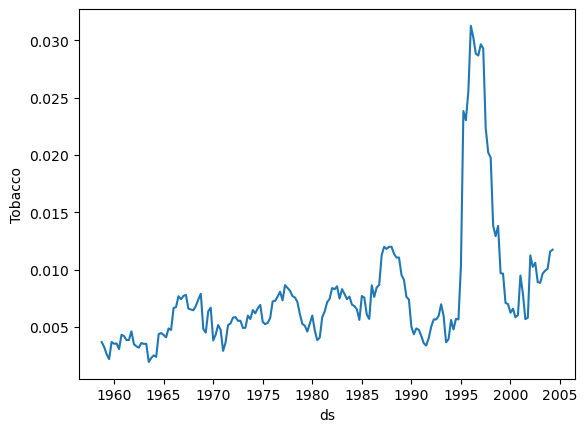

In [29]:
test = pd.DataFrame(y_transformed)
sns.lineplot(df, x='ds', y=test['Tobacco'].rolling(12).var())

In [40]:
df = pd.read_csv(f'../DATA/ansett.csv')
df['ds'] = pd.to_datetime(df['ds'])
df = df[df['Airports'] == 'MEL-SYD']
df = df[df['Class'] == 'Economy']
df.head()

,ds,Airports,Class,y
3881,1987-06-29,MEL-SYD,Economy,20167
3882,1987-07-06,MEL-SYD,Economy,20161
3883,1987-07-13,MEL-SYD,Economy,19993
3884,1987-07-20,MEL-SYD,Economy,20986
3885,1987-07-27,MEL-SYD,Economy,20497


<Axes: xlabel='ds', ylabel='y'>

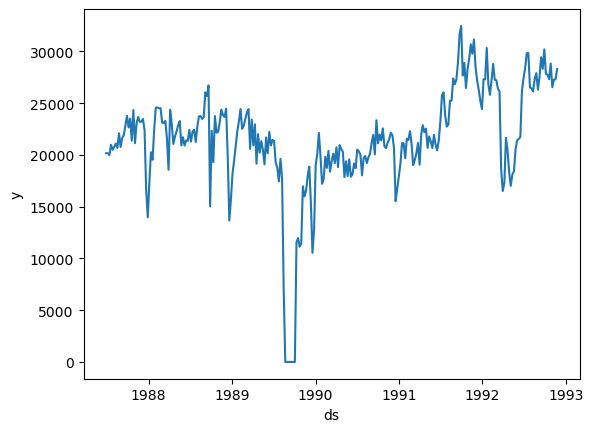

In [41]:
sns.lineplot(df, x='ds', y='y')

<Axes: xlabel='ds', ylabel='y'>

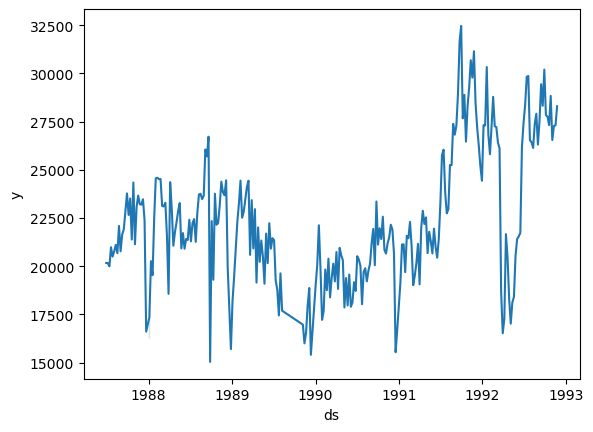

In [72]:
filtered_df = df[df['y'] > 15000]
sns.lineplot(filtered_df, x='ds', y='y')

-0.8888053894042969


<Axes: xlabel='ds'>

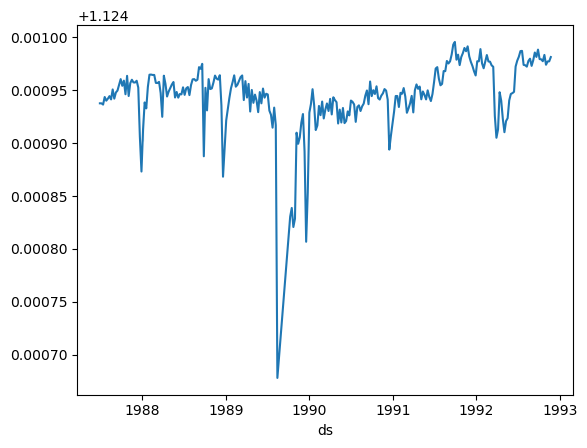

In [75]:
optim_lambda = boxcox_lambda(filtered_df["y"].to_numpy(), method="guerrero", season_length=4)
print(optim_lambda)
y_transformed = boxcox(df["y"].to_numpy(), optim_lambda)
sns.lineplot(df, x='ds', y=y_transformed)

<Axes: ylabel='y'>

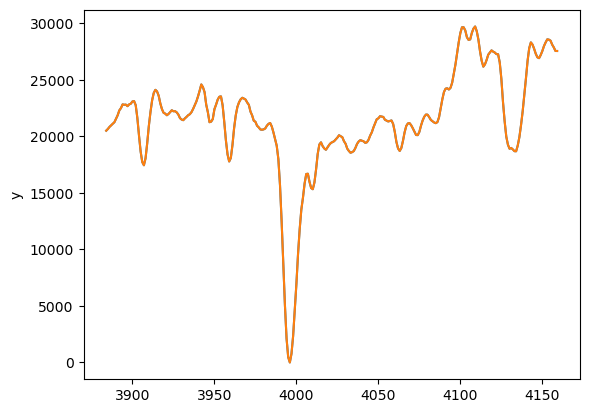

In [92]:

MA_5 = df['y'].rolling(5, center=True).mean()
MA_3_5 = MA_5.rolling(3, center=True).mean()
sns.lineplot(MA_3_5)

weighted_ma = (df['y']
    .rolling(window=7, center=True)
    .apply(lambda x: np.dot(x, [0.067, 0.133, 0.200, 0.200, 0.200, 0.133, 0.067]))
)
sns.lineplot(weighted_ma)